# Taller/Evaluación 7

## Josué Venegas Almonacid, 201873534-5
### Link de Youtube: https://youtu.be/Z0XtkNDY9fo

---
Como sabemos, la palta es un probablemente uno de los mejores y más característicos productos de nuestra cultura (chilena). Afortunada o desafortunadamente, este apetecido alimento (fruta o verdura?) se ha vuelto también muy popular entre los jóvenes de otros países, especialmente entre aquellos denominados *millenials* que suelen estar dispuestos a desembolsar cifras no despreciables por un ejemplar. En este taller tendrá que analizar datos reales sobre la venta de paltas en uno de los mercados más relevantes para nuestro país.


![texto alternativo](https://i0.wp.com/pousta.com/wp-content/uploads/2018/05/palta.jpg?resize=930%2C525&ssl=1)



## Datos



Los datos con los que trabajará se encuentran en los archivos *paltas-usa-normales.csv* y *paltas-usa-organicas.csv* que corresponden a las ventas semanales de palta en estados unidos, entre 2013 y 2018. El primer registro considera las paltas convencionales y el segundo aquellas que califican como orgánicas. Cada registro (fila) contiene atributos como: la fecha (Date) y ciudad (region) a la que corresponde el dato, el precio de venta (Price, valor promedio por unidad), y el número total de paltas vendidas (TotalVolume). Se tiene además información sobre el tamaño de las paltas (pequeña, media, grande) pero no la usaremos.



In [ ]:
#Si carga los datos localmente no necesita ejecutar esta celda.
#Si los carga desde Drive, debe cambiar la ruta a la carpeta donde se encuentran. 

print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Colab Notebooks/"#Esta es la ruta


Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

paltas_normales = pd.read_csv(path+'paltas-usa-normales.csv')
paltas_organicas = pd.read_csv(path+'paltas-usa-organicas.csv')
paltas_normales['month'] = paltas_normales['Date'].apply(lambda x: x.split('-')[1]).astype('int64')
paltas_organicas['month'] = paltas_organicas['Date'].apply(lambda x: x.split('-')[1]).astype('int64')

print(paltas_normales.head())
print("\nColumnas:", paltas_normales.columns.values)
print("\nN:", len(paltas_normales))

print("\n", paltas_organicas.head())
print("\nColumnas:", paltas_organicas.columns.values)
print("\nN:", len(paltas_organicas))

   Unnamed: 0        Date  region  ... Price      Prop  month
0        5616  2017-12-31  Albany  ...  1.47  0.970389     12
1        5617  2017-12-24  Albany  ...  1.45  0.954243     12
2        5618  2017-12-17  Albany  ...  1.43  0.952639     12
3        5619  2017-12-10  Albany  ...  1.29  0.960668     12
4        5620  2017-12-03  Albany  ...  1.39  0.975081     12

[5 rows x 12 columns]

Columnas: ['Unnamed: 0' 'Date' 'region' 'type' '4046' '4225' '4770' 'year'
 'TotalVolume' 'Price' 'Prop' 'month']

N: 3508

    Unnamed: 0        Date  region     type  ...  TotalVolume  Price      Prop  month
0       14741  2017-12-31  Albany  organic  ...      3463.85   1.46  0.029611     12
1       14742  2017-12-24  Albany  organic  ...      3694.13   1.58  0.045757     12
2       14743  2017-12-17  Albany  organic  ...      3513.77   1.43  0.047361     12
3       14744  2017-12-10  Albany  organic  ...      3779.98   1.45  0.039332     12
4       14745  2017-12-03  Albany  organic  ...      3

## Helpers (Funciones para Intervalos)


In [ ]:
from scipy.stats import norm, t, chisquare
from scipy.stats import f as fisher

#para media
def IC_media(muestra,alpha=0.05):
    n = len(muestra)
    media_muestral = np.mean(muestra)
    std_muestral = np.std(muestra,ddof=1)
    return t.interval(1-alpha, df=n-1, loc=media_muestral, scale=std_muestral/np.sqrt(n))


#para media1-media2
def IC_dos_medias_hetero(muestra1, muestra2, alpha=0.05):
  n1 = len(muestra1); n2 = len(muestra2);
  media1 = np.mean(muestra1); media2 = np.mean(muestra2); 
  std1 = np.std(muestra1,ddof=1); std2 = np.std(muestra2,ddof=1); 
  gl_num = (std1**2/float(n1) + std2**2/float(n2))**2
  gl_den = ((std1**2/float(n1))**2)/(n1-1.0) + ((std2**2/float(n2))**2)/(n2-1.0)
  gl = int(np.floor(gl_num/gl_den))
  t_alpha = t.ppf(1-alpha/2.0,df=gl)
  std_error = np.sqrt(std1**2/n1 + std2**2/n2)
  #print(">>",gl,std_error,t_alpha)
  IC_inf = (media1-media2) - t_alpha * std_error
  IC_sup = (media1-media2) + t_alpha * std_error 
  return IC_inf,IC_sup

#para sigma1**2
def IC_varianza(muestra1, alpha=0.05):
  n1 = len(muestra1); 
  var1 = np.var(muestra1,ddof=1); 
  a = chisquare.ppf(alpha/2.0,ddof=n1-1)
  b = chisquare.ppf(1-alpha/2.0,ddof=n1-1)
  IC_inf = (n1-1)*var1/b
  IC_sup = (n1-1)*var1/a
  return IC_inf,IC_sup

#para sigma1**2/sigma2**2
def IC_dos_varianzas(muestra1, muestra2, alpha=0.05):
  n1 = len(muestra1); n2 = len(muestra2);
  var1 = np.var(muestra1,ddof=1); var2 = np.var(muestra2,ddof=1); 
  cuociente = var1/var2
  fa = 1.0/fisher.ppf(1-alpha/2.0,dfn=n1-1, dfd=n2-1)
  fb = fisher.ppf(1-alpha/2.0,dfn=n2-1, dfd=n1-1)
  IC_inf = fa*cuociente
  IC_sup = fb*cuociente
  return IC_inf,IC_sup

#para prop1
def IC_prop(n1,frac1,alpha=0.05):
  std_err = np.sqrt((frac1*(1.0-frac1)/n1))
  z_alpha = norm.ppf(1-alpha/2.0)
  IC_inf = frac1 - z_alpha * std_err 
  IC_sup = frac1 + z_alpha * std_err
  return IC_inf,IC_sup

#para prop1-prop2
def IC_dos_props(n1,n2,frac1,frac2, alpha=0.05):
  std_err = np.sqrt((frac1*(1.0-frac1)/n1) + (frac2*(1.0-frac2)/n2))
  z_alpha = norm.ppf(1-alpha/2.0)
  IC_inf = (frac1-frac2) - z_alpha * std_err 
  IC_sup = (frac1-frac2) + z_alpha * std_err
  return IC_inf,IC_sup

## **1:  Orgánicas versus Normales**

Dado que producir una palta siguiendo estándares que la hagan calificar como *orgánica* es más costoso, es interesante preguntarse si esto se traduce en un mayor precio y margen de utilidad. 

> **¿Vale la pena producir una palta orgánica?**

Elabore una conclusión ejecutando las siguientes actividades:

1.   (10%) Construya sendos intervalos de confianza (I.C.) para el valor esperado del precio de la palta orgánica y normal. Adopte un nivel de confianza del 95%. Comente. 

2.   (10%) Construya un I.C. que de cuenta de la diferencia de precio de ambas variedades. Adopte un nivel de confianza del 95%. Comente.

3.   (25%) A partir de los resultados que obtuvo en 1 y 2, ¿Hay diferencias estadísticamente significativas entre los precios de las dos variedades? ¿Es posible afirmar que la palta orgánica se venderá con un margen esperado de al menos 40 centésimos de dolar respecto a la palta normal? 

4.   (25%) Determine como cambian sus intervalos de confianza cuando cambia el nivel de significación adoptado. Use estos resultados para refinar sus respuestas a las preguntas anteriores.

5.   (30%) Construya un I.C. que permita determinar si alguna de las variedades de palta es más variable que la otra. Comente tratando de extraer la mayor cantidad de información posible de sus resultados. 

El código de acá abajo prepara arreglos numpy con todas las observaciones de que se dispone.



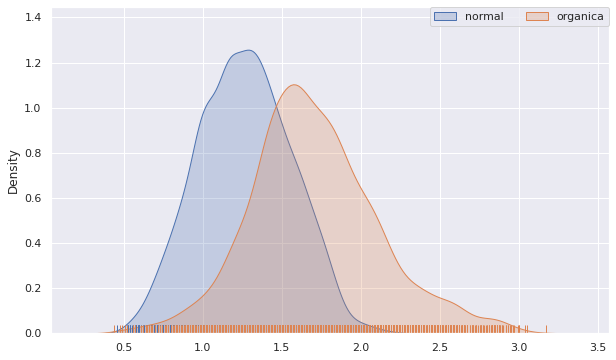

Media paltas normales 1.264 (sd = 0.294, n = 3508)
Media paltas orgánicas 1.704 (sd = 0.406, n = 3508)


In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

precios_paltas_normales = paltas_normales.Price.values#numpy array
precios_paltas_organicas = paltas_organicas.Price.values#numpy array

f, ax = plt.subplots(1,1,figsize=(10,6))
sns.distplot(a=precios_paltas_normales, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'normal')
sns.distplot(a=precios_paltas_organicas, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'organica')
ax.legend(loc='upper right', ncol=3,  borderaxespad=0.)

plt.show()

print("Media paltas normales {} (sd = {}, n = {})".format(round(np.mean(precios_paltas_normales), 3), round(np.std(precios_paltas_normales), 3), len(precios_paltas_normales)))
print("Media paltas orgánicas {} (sd = {}, n = {})".format(round(np.mean(precios_paltas_organicas), 3), round(np.std(precios_paltas_organicas), 3), len(precios_paltas_organicas)))

IC del valor esperado de paltas normales con un 95% de confianza : (1.255, 1.274)
IC del valor esperado de paltas orgánicas con un 95% de confianza: (1.691, 1.718)


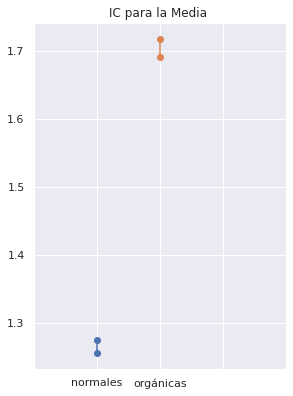

In [ ]:
#1. Construya sendos intervalos de confianza (I.C.) para el valor esperado del precio de la palta orgánica y normal. Adopte un 
#nivel de confianza del 95%. Comente.

#En estadística, se llama intervalo de confianza a un par o varios pares de números entre los cuales se estima que estará cierto 
#valor desconocido con un determinado nivel de confianza. Formalmente, estos números determinan un intervalo, que se calcula 
#a partir de datos de una muestra, y el valor desconocido es un parámetro poblacional. El nivel de confianza representa el 
#porcentaje de intervalos que, tomados de 100 muestras independientes distintas, contienen el valor desconocido. En estas 
#circunstancias, alfa es el llamado error aleatorio o nivel de significación, esto es, el número de intervalos de 100 que no 
#contienen el valor. Podemos elaborar un gráfico con intervalos de confianza sobre diferentes muestras y vamos a ver que en 
#ocasiones se cubre el valor esperado y a veces no, Pero se asegura que se cubrirá el valor 95/100 (para un error del 5%).

#Asumiendo que sigue una distribución normal, calcularemos la media u. De esta forma se sigue que:
IC_paltas_normales = IC_media(precios_paltas_normales)
IC_paltas_normales = round(IC_paltas_normales[0], 3),  round(IC_paltas_normales[1], 3)

IC_paltas_organicas = IC_media(precios_paltas_organicas)
IC_paltas_organicas = round(IC_paltas_organicas[0], 3),  round(IC_paltas_organicas[1], 3)

print("IC del valor esperado de paltas normales con un 95% de confianza : {}".format(IC_paltas_normales))
print("IC del valor esperado de paltas orgánicas con un 95% de confianza: {}".format(IC_paltas_organicas))

f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.5, 1.2])
ax.plot([1,1],IC_paltas_normales,'o-')
ax.plot([2,2],IC_paltas_organicas,'o-')
ax.set_xlim(0,4)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['normales','orgánicas'])
ax.set_title("IC para la Media ")
plt.show()

#Por lo tanto, Con un 95% de seguridad, el valor esperado para las paltas normales está entre 
#1,255 USD y 1,274 USD mientras que para las paltas orgánicas el valor esperado está entre 
#1,691 USD y 1,718 USD. Es decir, menos del 5% de las veces, los precios promedios por unidad 
#estarán fuera del intervalo. Notamos que la diferencia es significativa en cuanto a valor esperado 
#del precio. Sin embargo, se necesita más información al respecto para elaborar una conclusión.

IC de la diferencia de valor esperado de precio entre ambas variedades con un 95% de confianza : (0.424, 0.457)


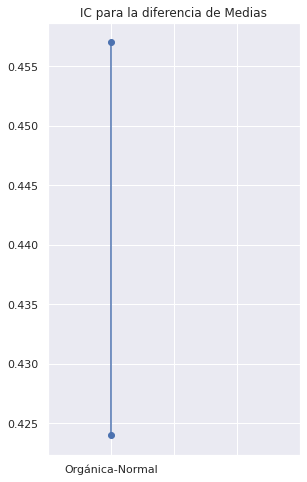

In [ ]:
#2. Construya un I.C. que de cuenta de la diferencia de precio de ambas variedades. Adopte 
#un nivel de confianza del 95%. Comente.

#Se usan las 2 poblaciones para corroborar de manera conjunta el análisis, ya que la
#probabilidad del 5% de error es para intervalos de confianza por sí solos, no entre ellos. 
#Con esto haremos 1 sólo IC para ambos.

IC_diferencia = IC_dos_medias_hetero(precios_paltas_organicas, precios_paltas_normales)
IC_diferencia = round(IC_diferencia[0], 3),  round(IC_diferencia[1], 3)
print("IC de la diferencia de valor esperado de precio entre ambas variedades con un 95% de confianza : {}".format(IC_diferencia))

f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.5, 1.5])
ax.plot([1,1],IC_diferencia,'o-')
ax.set_xlim(0,4)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Orgánica-Normal'])
ax.set_title("IC para la diferencia de Medias")
plt.show()

#Observamos que el IC Orgánica-Normal está completamente sobre el cero, esto sugeriría que los valores
#esperados de cada precio promedio no se interceptarían en ningún momento, lo que apoya los resultados 
#obtenidos independientemente en el inciso anterior.

In [ ]:
#3. A partir de los resultados que obtuvo en 1 y 2, ¿Hay diferencias estadísticamente 
#significativas entre los precios de las dos variedades? ¿Es posible afirmar que la 
#palta orgánica se venderá con un margen esperado de al menos 40 centésimos de 
#dolar respecto a la palta normal?

#Analizando los resultados anteriores, de donde se puede ver que los IC de las medias 
#observados están muy distantes entre sí, y que además el IC para la diferencia de
#las medias resulta positivo, se sugiere que existe fuerte evidencia para concluir que 
#el valor esperado (o media) de paltas orgánicas está por sobre la de paltas normales,
#con una cercanía entre los valores obtenidos en cada IC (0,436 - 0,444 USD si 
#comparamos los IC realizados individualmente y 0.424 - 0.457 USD mediante el IC
#de la diferencia de medias).

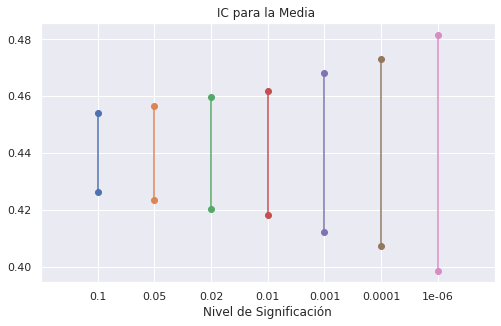

In [ ]:
#4. Determine como cambian sus intervalos de confianza cuando cambia el nivel de 
#significación adoptado. Use estos resultados para refinar sus respuestas a las preguntas 
#anteriores.

#Sin embargo, hay que analizar cómo afectan algunas variables en la obtención de estos 
#intervalos. Tanto el tamaño muestral como el nivel de significacion cambia el ancho del
#IC. A medida que aumentamos el tamaño muestral, se debería reducir el ancho del intervalo,
#ya que hay mayor cantidad de datos para analizar, ofreciendo una estimación más precisa.
#Notar que la media puede cambiar, pues según hemos visto en clases, la media puede 
#engañar el valor verdadero.

#Por su parte, el valor de alfa influye en el resultado de forma que a medida que alfa
#se hace más pequeño, el intervalo se hace más ancho, ya que la precisión disminuye, 
#debido a que hay que dar un intervalo más grande para poder cubrir el valor verdadero
#más veces.

#En este caso, no debería verse afectado, ya que observamos que los intervalos está muy
#distantes entre cada tipo de palta. Sin embargo, si los intervalos hubiesen chocado en 
#algún sector, esto hubiese sido importante.

f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  ax.plot([idx,idx], IC_dos_medias_hetero(precios_paltas_organicas, precios_paltas_normales, alpha=este_alpha),'o-')

ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Media ")

plt.show()

#Observamos que con un error de significación muy estricto (1e-06), el intervalo de la 
#diferencia de precios promedios esperados sigue rondando los 40 centésimos de 
#dolar en el extremo inferior, por lo que la afirmación realizada anteriormente sigue
#siendo consistente.

In [ ]:
#5. Construya un I.C. que permita determinar si alguna de las variedades de palta es más variable 
#que la otra. Comente tratando de extraer la mayor cantidad de información posible de sus resultados.

IC de varianza para un alfa 0.1 en paltas normales: (0.083, 0.09) (dif = 0.007)
IC de varianza para un alfa 0.05 en paltas normales: (0.083, 0.091) (dif = 0.008)
IC de varianza para un alfa 0.02 en paltas normales: (0.082, 0.091) (dif = 0.01)
IC de varianza para un alfa 0.01 en paltas normales: (0.081, 0.092) (dif = 0.011)
IC de varianza para un alfa 0.001 en paltas normales: (0.08, 0.094) (dif = 0.014)
IC de varianza para un alfa 0.0001 en paltas normales: (0.079, 0.095) (dif = 0.016)
IC de varianza para un alfa 1e-06 en paltas normales: (0.077, 0.097) (dif = 0.02)




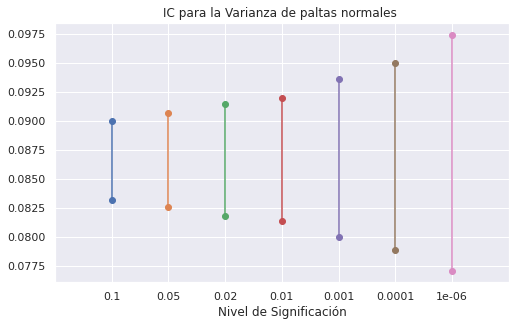

In [ ]:
#Analizaremos qué tanto cambia la varianza cuando cambiamos los alfa en ambos tipos de palta.
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_varianza(precios_paltas_normales, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {} en paltas normales: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza de paltas normales ")

plt.show()

#Observamos que la palta normal varía poco, ya que sus valores cambian entre 0,083 USD y
#0,09 USD para un alfa del 10%, mientras que para un alfa muy pequeño (1e-06) los valores
#siguen fluctuando en pequeña escala, entre 0,077 USD y 0,097 USD.

IC de varianza para un alfa 0.1 en paltas orgánicas: (0.159, 0.172) (dif = 0.013)
IC de varianza para un alfa 0.05 en paltas orgánicas: (0.158, 0.173) (dif = 0.015)
IC de varianza para un alfa 0.02 en paltas orgánicas: (0.156, 0.175) (dif = 0.018)
IC de varianza para un alfa 0.01 en paltas orgánicas: (0.155, 0.176) (dif = 0.02)
IC de varianza para un alfa 0.001 en paltas orgánicas: (0.153, 0.179) (dif = 0.026)
IC de varianza para un alfa 0.0001 en paltas orgánicas: (0.151, 0.182) (dif = 0.031)
IC de varianza para un alfa 1e-06 en paltas orgánicas: (0.147, 0.186) (dif = 0.039)




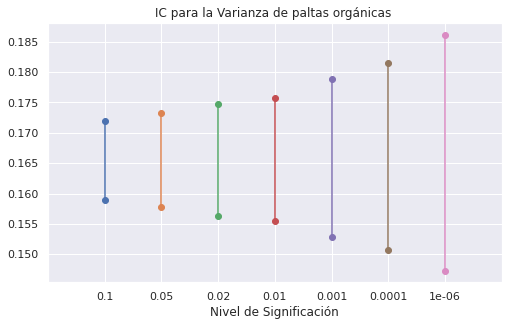

In [ ]:
#Realizamos el mismo procedimiento con la palta orgánica.
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_varianza(precios_paltas_organicas, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {} en paltas orgánicas: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza de paltas orgánicas ")

plt.show()
#Podemos apreciar que la variabilidad del precio en este tipo de palta es mayor, el cuál
#fluctúa entre 0,159 USD y 0,172 USD. Con un alfa más pequeño, la varianza se encuentra
#entre los 0,147 USD y 0,186 USD.

IC de varianza para un alfa 0.1: (0.495, 0.553) (dif = 0.058)
IC de varianza para un alfa 0.05: (0.49, 0.559) (dif = 0.069)
IC de varianza para un alfa 0.02: (0.484, 0.566) (dif = 0.082)
IC de varianza para un alfa 0.01: (0.48, 0.571) (dif = 0.091)
IC de varianza para un alfa 0.001: (0.468, 0.585) (dif = 0.117)
IC de varianza para un alfa 0.0001: (0.459, 0.597) (dif = 0.138)
IC de varianza para un alfa 1e-06: (0.444, 0.617) (dif = 0.174)




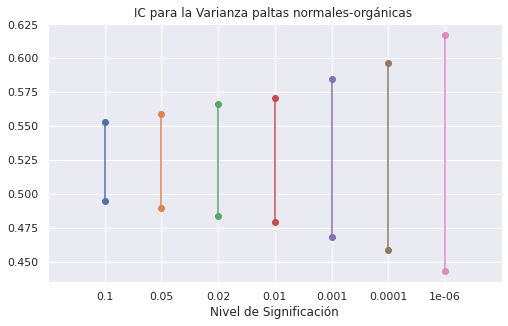

IC de varianza para un alfa 0.1: (1.808, 2.02) (dif = 0.212)
IC de varianza para un alfa 0.05: (1.789, 2.042) (dif = 0.253)
IC de varianza para un alfa 0.02: (1.767, 2.067) (dif = 0.301)
IC de varianza para un alfa 0.01: (1.752, 2.085) (dif = 0.333)
IC de varianza para un alfa 0.001: (1.71, 2.136) (dif = 0.426)
IC de varianza para un alfa 0.0001: (1.676, 2.18) (dif = 0.504)
IC de varianza para un alfa 1e-06: (1.62, 2.255) (dif = 0.635)




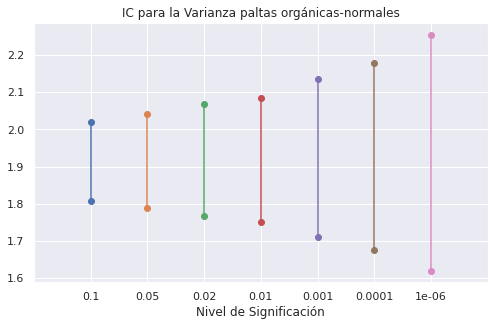

In [ ]:
#Si queremos corroborar esta información podemos realizar un análisis adicional, obteniendo
#un intervalo con ambas varianzas.
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_dos_varianzas(precios_paltas_normales, precios_paltas_organicas, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {}: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza paltas normales-orgánicas ")

plt.show()

f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_dos_varianzas(precios_paltas_organicas, precios_paltas_normales, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {}: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza paltas orgánicas-normales")

plt.show()

#De donde observamos que el caso en que se comparan paltas orgánicas con normales, los valores
#obtenidos son más grandes que cuando se comparan paltas normales con orgánicas. Es por esto,
#que se puede inferir a partir de la fórmula que los valores de las paltas orgánicas son más grandes.
#Adicionalmente podemos observar que la diferencia aumenta conforme disminuímos el alfa,
#cuyo motivo fue explicado en incisos anteriores.

## **2: Los Angeles versus New York**

La rivalidad y las diferencias de estilo de vida entre estas dos ciudades han sido retratadas en múltiples mini-series y películas. Es natural entonces preguntarse

> **¿Dónde tiene más oportunidades de prosperar un "Millenial" amante de las paltas? ¿Los Ángeles (LA) o en Nueva York (NY)?**

Elabore una conclusión ejecutando las siguientes actividades:

1.  (50%) Construya *un* I.C. que de cuenta de la diferencia de precios entre ambas ciudades. ¿Es posible afirmar que el Millenial pagará al menos 20 centésimos de dolar más en NY por una palta? Comente discutiendo el significado de los niveles de significación adoptados y su impacto en el resultado.

2.  (50%) Construya *un* I.C. para comparar la varianza de los precios en ambas ciudades. ¿Es posible afirmar que la palta es más variable en 1 de las dos ciudades? Comente discutiendo el significado de los niveles de significación adoptados y su impacto en el resultado.

El código de acá abajo prepara arreglos numpy con todas las observaciones de que se dispone para NY y LA.

Por favor separe el análisis de paltas orgánicas y normales.


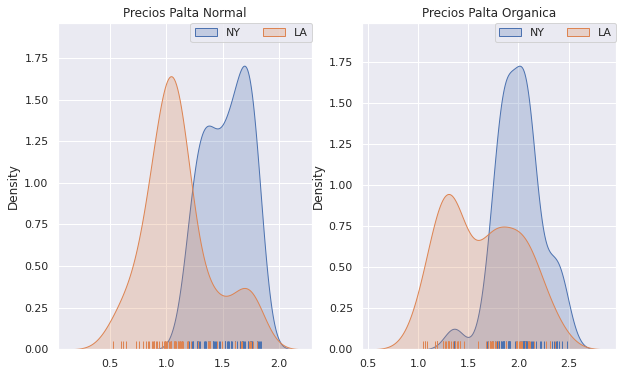

Media paltas normales en NY 1.533 (sd = 0.195, n = 65)
Media paltas normales en LA 1.11 (sd = 0.295, n = 65)
Media paltas orgánicas en NY 2.0 (sd = 0.225, n = 65)
Media paltas orgánicas en LA 1.635 (sd = 0.373, n = 65)


In [ ]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

precios_NY_normal = paltas_normales.loc[paltas_normales.region == 'NewYork'].Price.values
precios_LA_normal = paltas_normales.loc[paltas_normales.region == 'LosAngeles'].Price.values              
precios_NY_organica = paltas_organicas.loc[paltas_organicas.region == 'NewYork'].Price.values
precios_LA_organica = paltas_organicas.loc[paltas_organicas.region == 'LosAngeles'].Price.values              

f, ax = plt.subplots(1,2,figsize=(10,6))
sns.distplot(precios_NY_normal, ax=ax[0], rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'NY')
sns.distplot(precios_LA_normal, ax=ax[0], rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'LA')
ax[0].set_title("Precios Palta Normal")
ax[0].legend(loc='upper right', ncol=3,  borderaxespad=0.)

sns.distplot(precios_NY_organica, ax=ax[1], rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'NY')
sns.distplot(precios_LA_organica, ax=ax[1], rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'LA')
ax[1].set_title("Precios Palta Organica")
ax[1].legend(loc='upper right', ncol=3,  borderaxespad=0.)

plt.show()

print("Media paltas normales en NY {} (sd = {}, n = {})".format(round(np.mean(precios_NY_normal), 3), round(np.std(precios_NY_normal), 3), len(precios_NY_normal)))
print("Media paltas normales en LA {} (sd = {}, n = {})".format(round(np.mean(precios_LA_normal), 3), round(np.std(precios_LA_normal), 3), len(precios_LA_normal)))
print("Media paltas orgánicas en NY {} (sd = {}, n = {})".format(round(np.mean(precios_NY_organica), 3), round(np.std(precios_NY_organica), 3), len(precios_NY_organica)))
print("Media paltas orgánicas en LA {} (sd = {}, n = {})".format(round(np.mean(precios_LA_organica), 3), round(np.std(precios_LA_organica), 3), len(precios_LA_organica)))

In [ ]:
#1.Construya un I.C. que de cuenta de la diferencia de precios entre ambas ciudades. ¿Es posible 
#afirmar que el Millenial pagará al menos 20 centésimos de dolar más en NY por una palta? Comente 
#discutiendo el significado de los niveles de significación adoptados y su impacto en el resultado.

IC de diferencia para un alfa 0.1 en paltas normales: (0.35, 0.496)
IC de diferencia para un alfa 0.05 en paltas normales: (0.335, 0.51)
IC de diferencia para un alfa 0.02 en paltas normales: (0.319, 0.527)
IC de diferencia para un alfa 0.01 en paltas normales: (0.307, 0.539)
IC de diferencia para un alfa 0.001 en paltas normales: (0.274, 0.572)
IC de diferencia para un alfa 0.0001 en paltas normales: (0.245, 0.601)
IC de diferencia para un alfa 1e-06 en paltas normales: (0.194, 0.652)




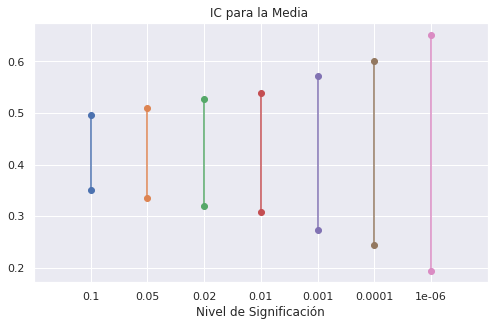

In [ ]:
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_diferencia =   IC_dos_medias_hetero(precios_NY_normal, precios_LA_normal, alpha=este_alpha)
  ax.plot([idx,idx], temp_diferencia,'o-')
  print("IC de diferencia para un alfa {} en paltas normales: {}".format(este_alpha,  (round(temp_diferencia[0], 3), round(temp_diferencia[1], 3))))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Media ")

plt.show()

#Similarmente a los análisis anteriores, podemos observar que, incluso con alfas muy estrictos,
#la diferencia sigue siendo de al menos 20 centésimos de dolar más en NY, por lo que estos
#resultados sugieren que dicha afirmación es correcta, al menos para las paltas normales.

IC de diferencia para un alfa 0.1 en paltas orgánicas: (0.274, 0.455)
IC de diferencia para un alfa 0.05 en paltas orgánicas: (0.257, 0.473)
IC de diferencia para un alfa 0.02 en paltas orgánicas: (0.236, 0.493)
IC de diferencia para un alfa 0.01 en paltas orgánicas: (0.222, 0.508)
IC de diferencia para un alfa 0.001 en paltas orgánicas: (0.181, 0.549)
IC de diferencia para un alfa 0.0001 en paltas orgánicas: (0.145, 0.585)
IC de diferencia para un alfa 1e-06 en paltas orgánicas: (0.082, 0.648)




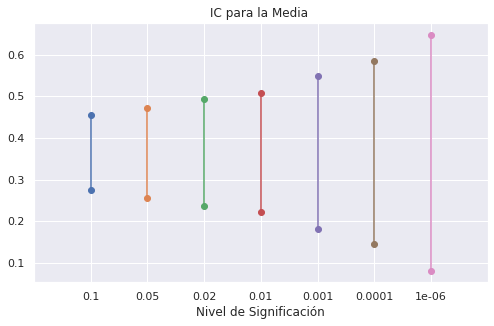

In [ ]:
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_diferencia =   IC_dos_medias_hetero(precios_NY_organica, precios_LA_organica, alpha=este_alpha)
  ax.plot([idx,idx], temp_diferencia,'o-')
  print("IC de diferencia para un alfa {} en paltas orgánicas: {}".format(este_alpha,  (round(temp_diferencia[0], 3), round(temp_diferencia[1], 3))))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Media ")

plt.show()
#Sin embargo, para las paltas orgánicas no es concluyente, pues vemos que para alfas más
#pequeños el extremo izquierdo del intervalo baja considerablemente, hasta llegar a una
#diferencia de 0,082 USD, lo que rechazaría la pregunta si eventualmente el valor verdadero
#estuviese allí.

In [ ]:
#2. Construya un I.C. para comparar la varianza de los precios en ambas ciudades. ¿Es posible 
#afirmar que la palta es más variable en 1 de las dos ciudades? Comente discutiendo el significado 
#de los niveles de significación adoptados y su impacto en el resultado.

IC de varianza para un alfa 0.1 en NY con paltas normales: (0.03, 0.053) (dif = 0.023)
IC de varianza para un alfa 0.05 en NY con paltas normales: (0.028, 0.056) (dif = 0.028)
IC de varianza para un alfa 0.02 en NY con paltas normales: (0.026, 0.061) (dif = 0.034)
IC de varianza para un alfa 0.01 en NY con paltas normales: (0.025, 0.064) (dif = 0.038)
IC de varianza para un alfa 0.001 en NY con paltas normales: (0.023, 0.074) (dif = 0.052)
IC de varianza para un alfa 0.0001 en NY con paltas normales: (0.021, 0.085) (dif = 0.064)
IC de varianza para un alfa 1e-06 en NY con paltas normales: (0.018, 0.107) (dif = 0.089)




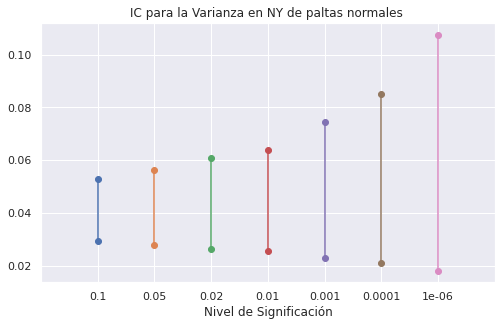

IC de varianza para un alfa 0.1 en LA con paltas normales: (0.067, 0.121) (dif = 0.054)
IC de varianza para un alfa 0.05 en LA con paltas normales: (0.064, 0.129) (dif = 0.065)
IC de varianza para un alfa 0.02 en LA con paltas normales: (0.06, 0.139) (dif = 0.078)
IC de varianza para un alfa 0.01 en LA con paltas normales: (0.058, 0.146) (dif = 0.088)
IC de varianza para un alfa 0.001 en LA con paltas normales: (0.052, 0.17) (dif = 0.118)
IC de varianza para un alfa 0.0001 en LA con paltas normales: (0.048, 0.194) (dif = 0.146)
IC de varianza para un alfa 1e-06 en LA con paltas normales: (0.042, 0.245) (dif = 0.204)




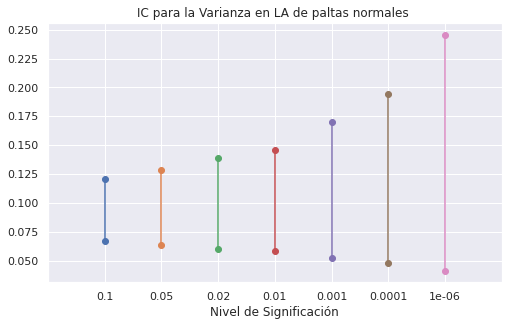

In [ ]:
#Analizaremos la varianza de la palta normal en NY y LA
#NY
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_varianza(precios_NY_normal, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {} en NY con paltas normales: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza en NY de paltas normales ")
plt.show()

#LA
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_varianza(precios_LA_normal, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {} en LA con paltas normales: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza en LA de paltas normales ")
plt.show()

#Observamos que los resultados sugieren que en LA las paltas normales varían más. Esto porque
#los valores de los extremos de los intervalos son mayores a los respectivos en NY (en LA la
#variación se encuentra entre 0,067 USD y 0,121 USD, mientras que en NY está entre 0,030 USD
#y 0,053 USD).

IC de varianza para un alfa 0.1 en NY con paltas orgánicas: (0.039, 0.07) (dif = 0.031)
IC de varianza para un alfa 0.05 en NY con paltas orgánicas: (0.037, 0.075) (dif = 0.038)
IC de varianza para un alfa 0.02 en NY con paltas orgánicas: (0.035, 0.081) (dif = 0.046)
IC de varianza para un alfa 0.01 en NY con paltas orgánicas: (0.034, 0.085) (dif = 0.051)
IC de varianza para un alfa 0.001 en NY con paltas orgánicas: (0.03, 0.099) (dif = 0.069)
IC de varianza para un alfa 0.0001 en NY con paltas orgánicas: (0.028, 0.113) (dif = 0.085)
IC de varianza para un alfa 1e-06 en NY con paltas orgánicas: (0.024, 0.143) (dif = 0.119)




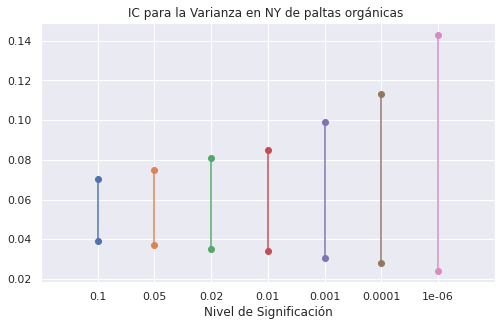

IC de varianza para un alfa 0.1 en LA con paltas orgánicas: (0.108, 0.194) (dif = 0.086)
IC de varianza para un alfa 0.05 en LA con paltas orgánicas: (0.103, 0.206) (dif = 0.104)
IC de varianza para un alfa 0.02 en LA con paltas orgánicas: (0.097, 0.222) (dif = 0.125)
IC de varianza para un alfa 0.01 en LA con paltas orgánicas: (0.093, 0.234) (dif = 0.141)
IC de varianza para un alfa 0.001 en LA con paltas orgánicas: (0.084, 0.272) (dif = 0.189)
IC de varianza para un alfa 0.0001 en LA con paltas orgánicas: (0.077, 0.311) (dif = 0.234)
IC de varianza para un alfa 1e-06 en LA con paltas orgánicas: (0.067, 0.393) (dif = 0.326)




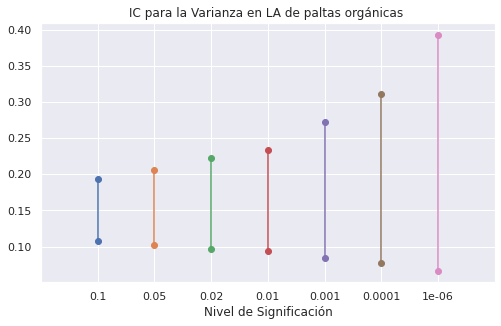

In [ ]:
#Ahora analizaremos la varianza de la palta orgánica en NY y LA
#NY
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_varianza(precios_NY_organica, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {} en NY con paltas orgánicas: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza en NY de paltas orgánicas ")
plt.show()

#LA
f = plt.figure(figsize=(7,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

mis_alphas = [.1, .05, 0.02, 0.01, 0.001, 0.0001, 0.000001]
for idx,este_alpha in enumerate(mis_alphas):
  temp_varianza =  IC_varianza(precios_LA_organica, alpha=este_alpha)
  ax.plot([idx,idx], temp_varianza,'o-')
  print("IC de varianza para un alfa {} en LA con paltas orgánicas: {} (dif = {})".format(este_alpha,  (round(temp_varianza[0], 3), round(temp_varianza[1], 3)), round(temp_varianza[1]-temp_varianza[0], 3)))

print("\n")
ax.set_xlim(-1,len(mis_alphas))
ax.set_xticks(np.arange(0,len(mis_alphas)+.5,1))
ax.set_xticklabels(mis_alphas)
ax.set_xlabel("Nivel de Significación")
ax.set_title("IC para la Varianza en LA de paltas orgánicas ")
plt.show()

#En las paltas orgánicas sucede de manera similar, ya que los resultados sugieren que en LA varían
#más. Vemos que los valores de los extremos de los intervalos son mayores a los respectivos en NY,
#con una varianza entre 0,108 USD y 0,194 USD en LA y una varianza entre 0,039 USD y 0,070 USD
#en NY.

## **3: Efectos Estacionales**

Sabemos que, lamentablemente, la producción de paltas no es constante durante el año. Esto nos lleva a preguntarnos

> **¿Cambia el atractivo de NY o LA para un "Millenial" amante de las paltas dependiendo de la época año?**

Elabore una conclusión ejecutando las siguientes actividades:

1.   (50%) Construya un I.C. para la proporción del tiempo en que los precios de la palta en LA superan la media nacional. Haga lo mismo con NY. Adopte un nivel de confianza del 95%. Comente brevemente. 

2.   (50%) Construya un I.C. para la proporción del tiempo en que los precios de la palta en LA superan la media nacional, restringiendo el análisis sólo a los meses de invierno. Haga lo mismo con NY. Adopte un nivel de confianza del 95%. Comente brevemente. 

**Para no alargar, haga sólo el análisis de las paltas normales y (en esta parte) no considere necesario varie el nivel de significación .**

El código de acá abajo prepara arreglos numpy con todos los datos que necesita. Por ejemplo, p_LA_Invierno es el porcentaje (empírico) de las veces que se observa un precio mayor que la media nacional en LA.


IC NY todo el año: (0.88, 0.997)
IC LA todo el año: (0.09, 0.279)


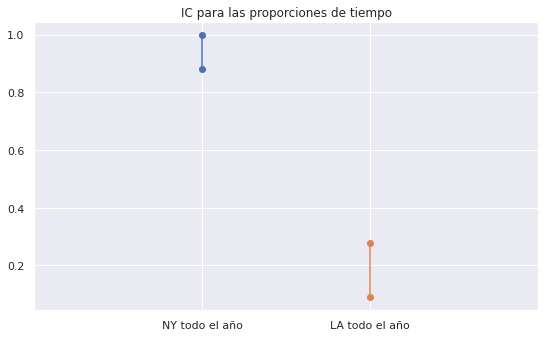

In [ ]:
US_por_fecha = paltas_normales.groupby('Date').mean().reset_index()
LA_normales_por_fecha = paltas_normales[paltas_normales.region=='LosAngeles'].groupby('Date').mean().reset_index()
NA_normales_por_fecha = paltas_normales[paltas_normales.region=='NewYork'].groupby('Date').mean().reset_index()

Comparativo = pd.merge(LA_normales_por_fecha[['Date','Price','month']], NA_normales_por_fecha[['Date','Price']], on="Date",suffixes=('_LA','_NY'))
Comparativo = pd.merge(Comparativo[['Date','Price_LA','Price_NY','month']], US_por_fecha[['Date','Price']], on="Date")
Comparativo_Invierno = Comparativo[Comparativo['month'].between(8, 10)]

##todos los precios están ordenados por fecha
precios_LA_Invierno =  Comparativo_Invierno.Price_LA.values
precios_NY_Invierno =  Comparativo_Invierno.Price_NY.values
precios_USA_Invierno =  Comparativo_Invierno.Price.values
precios_LA =  Comparativo.Price_LA.values
precios_NY =  Comparativo.Price_NY.values
precios_USA =  Comparativo.Price.values

#proporcion del tiempo LA > Media USA en Invierno
p_LA_Invierno = np.sum([(precios_LA_Invierno - precios_USA_Invierno) > 0])/len(precios_LA_Invierno)
n_LA_Invierno = len(precios_LA_Invierno)

#proporcion del tiempo NY > Media USA en Invierno
p_NY_Invierno = np.sum([(precios_NY_Invierno - precios_USA_Invierno) > 0])/len(precios_NY_Invierno)
n_NY_Invierno = len(precios_NY_Invierno)

#proporcion del tiempo LA > Media USA considerando todo el año
p_LA = np.sum([(precios_LA  - precios_USA) > 0])/len(precios_LA)
n_LA = len(precios_LA)

#proporcion del tiempo NY > Media USA considerando todo el año
p_NY  = np.sum([(precios_NY - precios_USA) > 0])/len(precios_NY)
n_NY = len(precios_NY)

#print(p_LA_Invierno,p_NY_Invierno)
#print(p_LA,p_NY)


#1. Construya un I.C. para la proporción del tiempo en que los precios de la palta en LA superan la 
#media nacional. Haga lo mismo con NY. Adopte un nivel de confianza del 95%. Comente brevemente.

IC_prop_general_NY = IC_prop(n_NY, p_NY)
IC_prop_general_NY = round(IC_prop_general_NY[0], 3), round(IC_prop_general_NY[1], 3)
print("IC NY todo el año:", IC_prop_general_NY)

IC_prop_general_LA = IC_prop(n_LA, p_LA)
IC_prop_general_LA = round(IC_prop_general_LA[0], 3), round(IC_prop_general_LA[1], 3)
print("IC LA todo el año:", IC_prop_general_LA)

f = plt.figure(figsize=(7,4))
ax = f.add_axes([5, 5, 1.0, 1.0])
ax.plot([1,1],IC_prop_general_NY,'o-')
ax.plot([2,2],IC_prop_general_LA,'o-')
ax.set_xlim(0,3)
ax.set_xticks([1,2])
ax.set_xticklabels(['NY todo el año', 'LA todo el año'])
ax.set_title("IC para las proporciones de tiempo")
plt.show()

#Del gráfico podemos ver que ambos intervalos están muy distantes, sumado al hecho de que
#en NY entre el 88% y 99,7% del tiempo los precios de la palta superan la media nacional, 
#contrastado con LA que la proporción de tiempo en que sus precios superan la media está entre
#9% y 27,9%. Con esto podemos decir que con un 95% de confianza en NY supera la media
#nacional durante más tiempo.

IC NY en invierno: (0.441, 0.943)
IC LA en invierno: (0.267, 0.809)


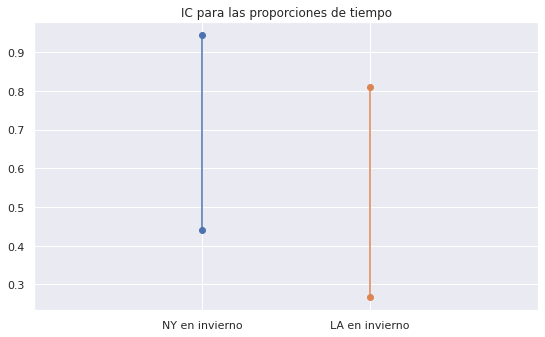

N NY: 13
N LA: 13


In [ ]:
#1. Construya un I.C. para la proporción del tiempo en que los precios de la palta en LA superan la 
#media nacional, restringiendo el análisis sólo a los meses de invierno. Haga lo mismo con NY. 
#Adopte un nivel de confianza del 95%. Comente brevemente.

IC_prop_invierno_NY = IC_prop(n_NY_Invierno, p_NY_Invierno)
IC_prop_invierno_NY = round(IC_prop_invierno_NY[0], 3), round(IC_prop_invierno_NY[1], 3)
print("IC NY en invierno:", IC_prop_invierno_NY)

IC_prop_invierno_LA = IC_prop(n_LA_Invierno, p_LA_Invierno)
IC_prop_invierno_LA = round(IC_prop_invierno_LA[0], 3), round(IC_prop_invierno_LA[1], 3)
print("IC LA en invierno:", IC_prop_invierno_LA)

f = plt.figure(figsize=(7,4))
ax = f.add_axes([5, 5, 1.0, 1.0])
ax.plot([1,1],IC_prop_invierno_NY,'o-')
ax.plot([2,2],IC_prop_invierno_LA,'o-')
ax.set_xlim(0,3)
ax.set_xticks([1,2])
ax.set_xticklabels(['NY en invierno', 'LA en invierno'])
ax.set_title("IC para las proporciones de tiempo")
plt.show()

print("N NY:", n_NY_Invierno)
print("N LA:", n_LA_Invierno)

#Sin embargo, para invierno los resultados no son suficientes para concluir qué ciudad lidera la
#proporción de tiempo en que sus precios superan la media nacional, debido a que, como vemos
#en el gráfico, parte de los intervalos se interceptan. Esto quiere decir que el % del tiempo
#en que el precio supera la media nacional puede ser mayor en NY, o eventualmente en LA.
#Concretamente, en NY la proporción se encuentra entre el 44% y 94%, mientras que en LA se 
#encuentra entre el 26% y el 80%.

## Conclusiones


Escriba conlusiones que resuman los principales hallazgos del taller.

**¿Vale la pena producir una palta orgánica?**
Analizando el valor esperado de cada variedad de palta, se encontró que el precio promedio de las paltas orgánicas es mayor al precio promedio de las paltas normales, con un % de confianza del 95%. Posteriormente, comparando los resultados con un I.C. que evidenciara la diferencia de precios entre ambos tipos de palta, se llegó a la conclusión que la palta orgánica supera a su par normal con un margen esperado de al menos 40 centésimos de dólar, incluso cambiando los niveles de significación. 

Por otro lado, los valores obtenidos indican que la palta orgánica es más variable que la palta normal, ya que la variación de la primera se encontraría entre los 0,159 USD y los 0,172 USD, mientras que la segunda está entre los 0,083 USD y los 0,090 USD.

Dicho esto, sumado al hecho de que producir una palta siguiendo estándares que la hagan calificar como orgánica es más costoso, se pone en duda si realmente vale la pena producir palta orgánica. Si los costos de producción fueran solventados con la diferencia de al menos 40 centésimos de dólar (incluyendo sus variaciones durante el tiempo), la producción de este tipo de palta sería beneficioso, sin embargo, este análisis escapa del alcance de este estudio.

**¿Dónde tiene más oportunidades de prosperar un "Millenial" amante de las paltas?**
Viéndolo desde el lado de un amante de las paltas, podemos observar que se pagará al menos 20 centésimos de dólar más en NY que en LA, al menos para el caso de la variante normal de palta. Para el tipo orgánico la información obtenida no es suficiente para confirmar dicha afirmación, puesto que para alfas más pequeños los resultados varían, alcanzando una diferencia de al menos 10 centésimos de dólar.

En cuanto a variaciones de precios, el análisis indica que en LA las paltas normales varían más, ubicándose entre los 0,067 USD y 0,121 USD, mientras que en NY está entre 0,030 USD y 0,053 USD. Similarmente, las paltas orgánicas varían más en LA, cuyo intervalo es de 0,108 USD y 0,194 USD, mayor a su contraparte en NY con valores de 0,039 USD y 0,070 USD.

Dicho esto, un amante de las paltas prosperaría más en LA, ya que, a pesar de que varía más el precio, nunca llega a superar a los de NY.

**¿Cambia el atractivo de NY o LA para un "Millenial" amante de las paltas dependiendo de la época año?**
A lo largo del año sí cambia. Se observó que con un 95% de confianza NY supera el precio medio nacional entre un 88% y 99,7% del tiempo, mientras que en LA esto sucede entre un 9% y 27,9%.

Sin embargo, si analizamos la época de invierno, la diferencia no es estadísticamente concluyente, ya que los intervalos de confianza individuales se solapan, teniendo a NY una proporción de tiempo entre el 44% y 94% y a LA entre el 26% y el 80%.  La incapacidad de obtener una conclusión se debe principalmente al tamaño de la muestra, con la cantidad de apenas 13 datos.




Por favor no ovide:



1.   **Cambiar el nombre de este notebook indentificándolo con su nombre y apellido o con su rol@usm para evitar duplicados.**

2.   **Incluir el link al video explicativo dentro de este notebook.**

